<a href="https://colab.research.google.com/github/Shrushti-2002/OIBSIP/blob/main/EDA_on_retail_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) on Retail Sales Data
The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Data Loading and Cleaning: Load the retail sales dataset.

In [2]:
# Load the retail sales data
retail_data = pd.read_csv('retail_sales_dataset.csv')

In [3]:
# Display the first few rows of the dataset
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
retail_data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# Convert the 'Date' column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

In [7]:
# Set the 'Date' column as the index
retail_data.set_index('Date', inplace=True)

In [8]:
# Create a new column 'Sales' by multiplying 'Quantity' and 'UnitPrice'
retail_data['Sales'] = retail_data['Quantity'] * retail_data['Price per Unit']

In [9]:
# Display the updated dataframe
print(retail_data.head())

            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3     CUST003    Male   50      Electronics   
2023-05-21               4     CUST004    Male   37         Clothing   
2023-05-06               5     CUST005    Male   30           Beauty   

            Quantity  Price per Unit  Total Amount  Sales  
Date                                                       
2023-11-24         3              50           150    150  
2023-02-27         2             500          1000   1000  
2023-01-13         1              30            30     30  
2023-05-21         1             500           500    500  
2023-05-06         2              50           100    100  


In [10]:
# Check for missing values
print(retail_data.isnull().sum())

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Sales               0
dtype: int64


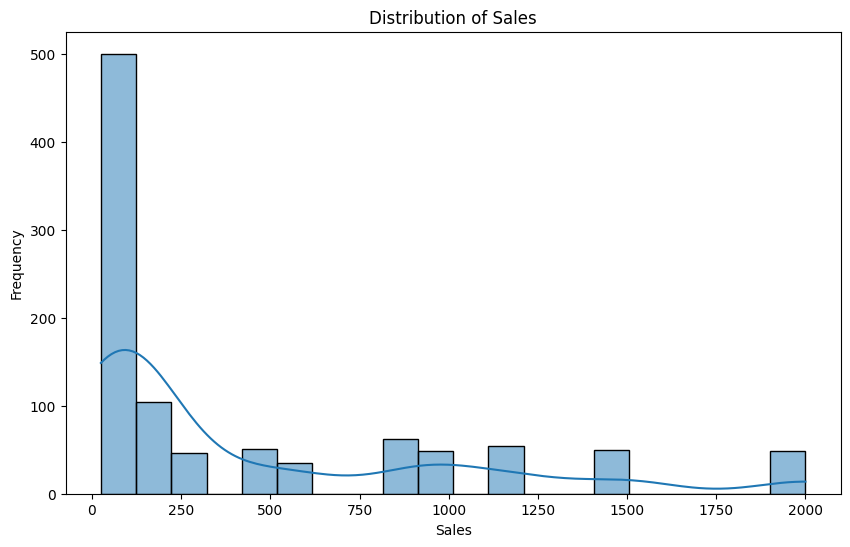

In [11]:
# Histogram of sales
plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

#Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [12]:
# Calculate mean, median, mode, standard deviation, minimum, maximum, and quartiles for sales
sales_mean = retail_data['Sales'].mean()
sales_median = retail_data['Sales'].median()
sales_mode = retail_data['Sales'].mode()[0]  # Mode may have multiple values, so we take the first one
sales_std = retail_data['Sales'].std()
sales_min = retail_data['Sales'].min()
sales_max = retail_data['Sales'].max()
sales_quartiles = retail_data['Sales'].quantile([0.25, 0.5, 0.75])

In [13]:
# Print the results
print("Mean Sales:", sales_mean)
print("Median Sales:", sales_median)
print("Mode Sales:", sales_mode)
print("Standard Deviation of Sales:", sales_std)
print("Minimum Sales:", sales_min)
print("Maximum Sales:", sales_max)
print("Quartiles of Sales:")
print(sales_quartiles)

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123
Minimum Sales: 25
Maximum Sales: 2000
Quartiles of Sales:
0.25     60.0
0.50    135.0
0.75    900.0
Name: Sales, dtype: float64


In [14]:
# Summary statistics
print(retail_data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount  \
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000   
mean       500.500000    41.39200     2.514000      179.890000    456.000000   
std        288.819436    13.68143     1.132734      189.681356    559.997632   
min          1.000000    18.00000     1.000000       25.000000     25.000000   
25%        250.750000    29.00000     1.000000       30.000000     60.000000   
50%        500.500000    42.00000     3.000000       50.000000    135.000000   
75%        750.250000    53.00000     4.000000      300.000000    900.000000   
max       1000.000000    64.00000     4.000000      500.000000   2000.000000   

             Sales  
count  1000.000000  
mean    456.000000  
std     559.997632  
min      25.000000  
25%      60.000000  
50%     135.000000  
75%     900.000000  
max    2000.000000  


#Time Series Analysis: Analyze sales trends over time using time series techniques.

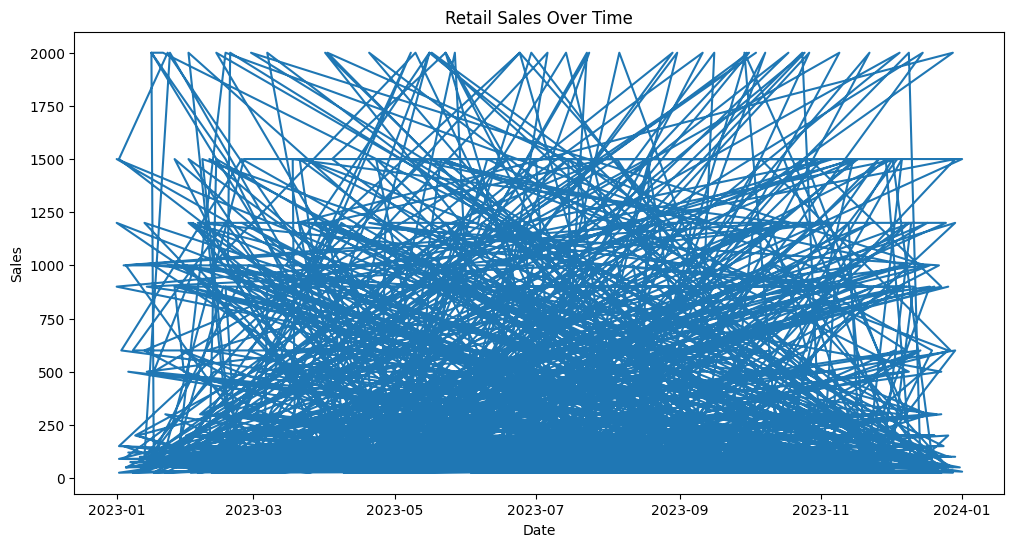

In [15]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(retail_data['Sales'])
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [16]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(retail_data['Sales'], model='additive', period=12)

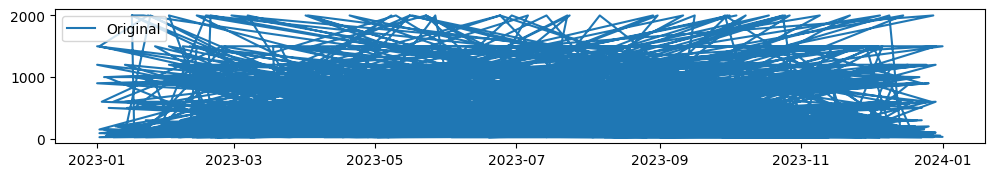

In [17]:
# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')

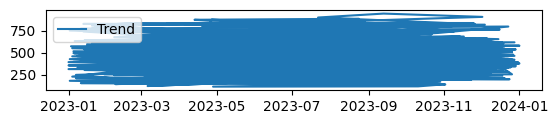

In [18]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

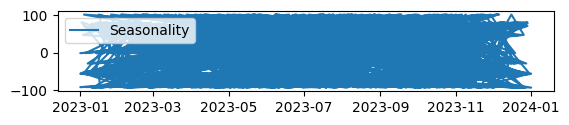

In [19]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

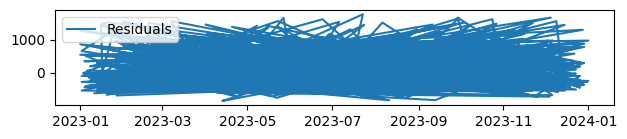

In [20]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
Customer Analysis:
1. Calculate the total number of customers.
2. Analyze customer demographics (if available).
3. Examine customer purchasing behavior, such as frequency of purchases and average purchase amount.

In [21]:
# Calculate the total number of customers
total_customers = retail_data['Customer ID'].nunique()

In [22]:
# Convert the 'Gender' column to a numeric type if necessary
retail_data['Gender'] = retail_data['Gender'].astype('category').cat.codes

In [23]:
# Analyze customer demographics (if available)
customer_demographics = retail_data.groupby('Customer ID')[['Age', 'Gender']].mean()

In [24]:
# Print the customer demographics
print(customer_demographics)

              Age  Gender
Customer ID              
CUST001      34.0     1.0
CUST002      26.0     0.0
CUST003      50.0     1.0
CUST004      37.0     1.0
CUST005      30.0     1.0
...           ...     ...
CUST995      41.0     0.0
CUST996      62.0     1.0
CUST997      52.0     1.0
CUST998      23.0     0.0
CUST999      36.0     0.0

[1000 rows x 2 columns]


In [25]:
# Examine customer purchasing behavior
purchase_frequency = retail_data.groupby('Customer ID').size().mean()
average_purchase_amount = retail_data.groupby('Customer ID')['Sales'].mean()

In [26]:
# Print the results
print("Total number of customers:", total_customers)
print("\nCustomer demographics:")
print(customer_demographics.head())
print("\nAverage purchase frequency:", purchase_frequency)
print("Average purchase amount:")
print(average_purchase_amount.head())

Total number of customers: 1000

Customer demographics:
              Age  Gender
Customer ID              
CUST001      34.0     1.0
CUST002      26.0     0.0
CUST003      50.0     1.0
CUST004      37.0     1.0
CUST005      30.0     1.0

Average purchase frequency: 1.0
Average purchase amount:
Customer ID
CUST001     150.0
CUST002    1000.0
CUST003      30.0
CUST004     500.0
CUST005     100.0
Name: Sales, dtype: float64


#Product Analysis:
1. Calculate the total number of products sold.
2. Identify the top-selling products.
3. Analyze product categories and their sales performance.

In [27]:
# You can use the 'apply' function along with a lambda function to generate unique IDs
retail_data['ProductID'] = retail_data.apply(lambda row: hash((row['Product Category'])), axis=1)

In [28]:
# Display the updated dataframe
print(retail_data.head())

            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001       1   34           Beauty   
2023-02-27               2     CUST002       0   26         Clothing   
2023-01-13               3     CUST003       1   50      Electronics   
2023-05-21               4     CUST004       1   37         Clothing   
2023-05-06               5     CUST005       1   30           Beauty   

            Quantity  Price per Unit  Total Amount  Sales            ProductID  
Date                                                                            
2023-11-24         3              50           150    150  -734615193886834070  
2023-02-27         2             500          1000   1000 -4701528310625181970  
2023-01-13         1              30            30     30  5684006953704983670  
2023-05-21         1             500           500    500 -4701528310625181970  
2023-05-0

In [29]:
# Calculate the total number of products sold
total_products_sold = retail_data['ProductID'].nunique()

In [30]:
# Identify the top-selling products
top_selling_products = retail_data['ProductID'].value_counts().head(10)

In [31]:
# Analyze product categories and their sales performance
product_category_sales = retail_data.groupby('Product Category')['Sales'].sum()

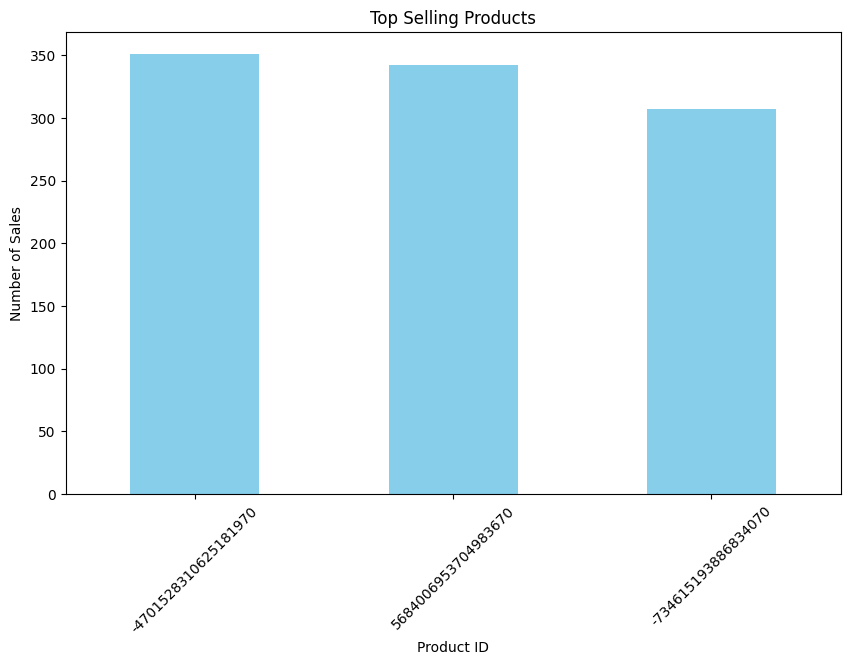

In [32]:
# Plot the top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

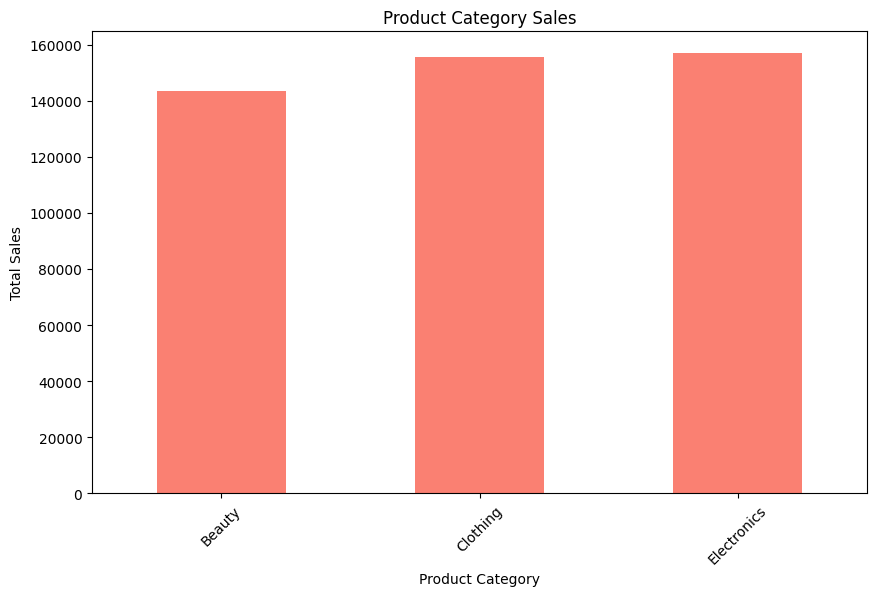

In [33]:
# Plot product category sales
plt.figure(figsize=(10, 6))
product_category_sales.plot(kind='bar', color='salmon')
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [34]:
import pandas as pd

# Check for non-numeric values in each column
for col in retail_data.columns:
    if not pd.api.types.is_numeric_dtype(retail_data[col]):
        print(f"Column '{col}' contains non-numeric values.")

Column 'Customer ID' contains non-numeric values.
Column 'Product Category' contains non-numeric values.


In [35]:
# Drop columns with non-numeric values
retail_data = retail_data.select_dtypes(include=[np.number])

In [36]:
# Create a correlation matrix
correlation_matrix = retail_data.corr()

In [37]:
# Print the correlation matrix
print(correlation_matrix)

                Transaction ID    Gender       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.010387  0.065191 -0.026623       -0.060837   
Gender                0.010387  1.000000  0.002621 -0.028023       -0.000961   
Age                   0.065191  0.002621  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.028023 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.000961 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.001001 -0.060568  0.373707        0.851925   
Sales                -0.075034 -0.001001 -0.060568  0.373707        0.851925   
ProductID             0.030353  0.003902 -0.000305 -0.023363        0.014792   

                Total Amount     Sales  ProductID  
Transaction ID     -0.075034 -0.075034   0.030353  
Gender             -0.001001 -0.001001   0.003902  
Age                -0.060568 -0.060568  -0.000305  
Quantity            0.373707  0.373707  -0.023363  
Price per Unit     

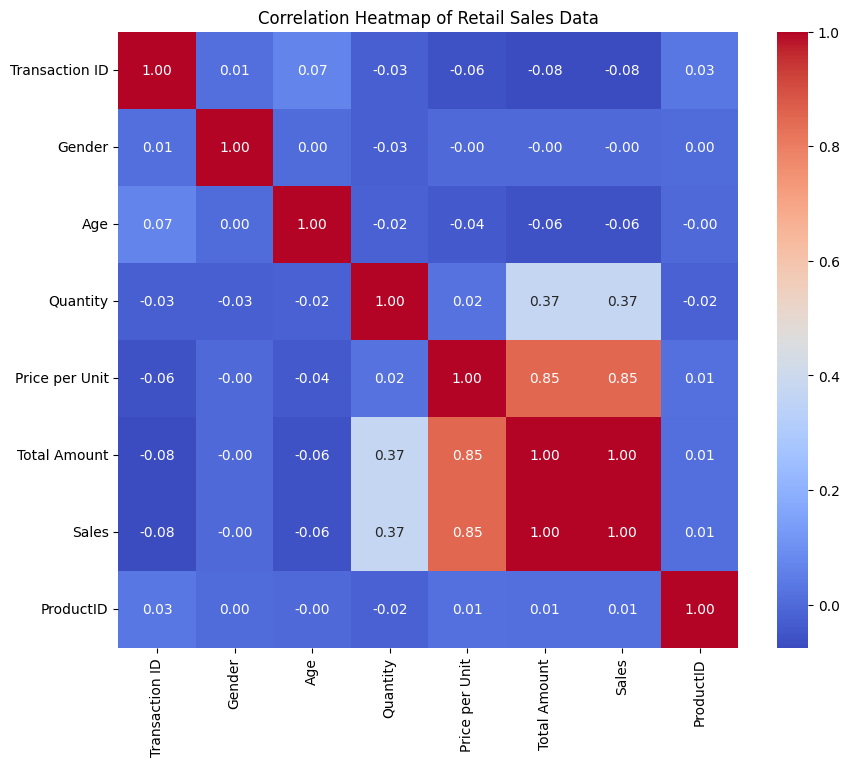

In [38]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Retail Sales Data')
plt.show()

In [39]:
# Group the data by date and calculate the total sales for each date
sales_by_date = retail_data.groupby('Date')['Sales'].sum()

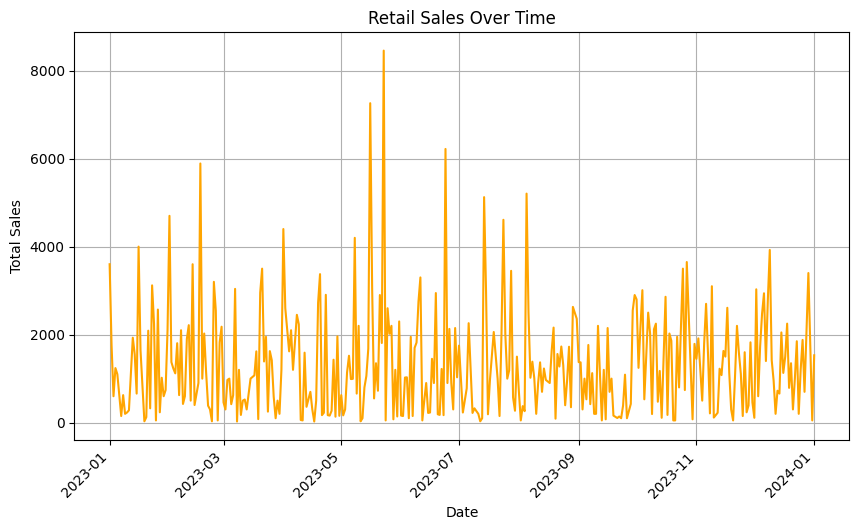

In [40]:
# Plot the line chart
plt.figure(figsize=(10, 6))
sales_by_date.plot(kind='line', color='orange')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()